In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from collections import Counter


In [12]:
max_features = 100  # no of words to consider as features
maxlen = 10 
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(f'Training data: {len(input_train)} samples')
print(f'Test data: {len(input_test)} samples')

Training data: 25000 samples
Test data: 25000 samples


In [15]:
#Word index and decoding reviews
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])
print(decode_review(input_train[0]))

? this film was just ? ? ? ? story ? ? really ? the ? they ? and you ? just ? ? there ? ? is an ? ? and ? the ? ? ? ? ? ? from the ? ? ? as ? so i ? the ? there was a ? ? with this film the ? ? ? the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would ? it to ? to ? and the ? ? was ? really ? at the ? it was so ? and you ? what they ? if you ? at a film it ? have been good and this ? was also ? to the ? ? ? that ? the ? of ? and ? they were just ? ? are ? ? out of the ? ? i ? because the ? that ? them all ? up are ? a ? ? for the ? film but ? ? are ? and ? be ? for what they have ? don't you ? the ? story was so ? because it was ? and was ? ? ? all that was ? with ? all


In [17]:
# #visualize review length distribution
# review_lengths = [len(x) for x in input_train]
# plt.hist(review_lengths, bins=50)
# plt.xlabel('Review Length')
# plt.ylabel('Frequency')
# plt.title('Distribution of Review Lengths')
# plt.show()

In [18]:
# #Visualize word frequency
# all_words = [word for review in input_train for word in review]
# word_freq = Counter(all_words)
# common_words = word_freq.most_common(20)
# common_words = [(reverse_word_index.get(i - 3, '?'), freq) for i, freq in common_words]
# words, freqs = zip(*common_words)
# plt.bar(words, freqs)
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Most Common Words in IMDb Reviews')
# plt.xticks(rotation=45)
# plt.show()

In [19]:
# Preprocessing data
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


In [41]:
epochs = 3

# RNN Model

In [42]:

model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 128)         12800     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17985 (70.25 KB)
Trainable params: 17985 (70.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
history_rnn = model_rnn.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 7s 8ms/step - loss: 0.6703 - accuracy: 0.5806 - val_loss: 0.6648 - val_accuracy: 0.5908
Epoch 2/3
625/625 [==============================] - 4s 7ms/step - loss: 0.6530 - accuracy: 0.6085 - val_loss: 0.6727 - val_accuracy: 0.5796
Epoch 3/3
625/625 [==============================] - 4s 7ms/step - loss: 0.6489 - accuracy: 0.6150 - val_loss: 0.6713 - val_accuracy: 0.5836


In [44]:
score_rnn = model_rnn.evaluate(input_test, y_test)
print(f'RNN Test Loss: {score_rnn[0]}, Test Accuracy: {score_rnn[1]}')

782/782 [==============================] - 3s 4ms/step - loss: 0.6683 - accuracy: 0.5891
RNN Test Loss: 0.6682590842247009, Test Accuracy: 0.5890799760818481


# LSTM

In [45]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         12800     
                                                                 
 lstm_2 (LSTM)               (None, 32)                20608     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 33441 (130.63 KB)
Trainable params: 33441 (130.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
history_lstm = model_lstm.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 10s 10ms/step - loss: 0.6683 - accuracy: 0.5781 - val_loss: 0.6637 - val_accuracy: 0.5940
Epoch 2/3
625/625 [==============================] - 6s 9ms/step - loss: 0.6558 - accuracy: 0.6012 - val_loss: 0.6621 - val_accuracy: 0.5866
Epoch 3/3
625/625 [==============================] - 6s 9ms/step - loss: 0.6524 - accuracy: 0.6022 - val_loss: 0.6615 - val_accuracy: 0.5834


In [47]:
score_lstm = model_lstm.evaluate(input_test, y_test)
print(f'LSTM Test Loss: {score_lstm[0]}, Test Accuracy: {score_lstm[1]}')

782/782 [==============================] - 4s 5ms/step - loss: 0.6547 - accuracy: 0.5977
LSTM Test Loss: 0.6546998023986816, Test Accuracy: 0.5977200269699097


# GRU

In [48]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 128))
model_gru.add(GRU(32))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 128)         12800     
                                                                 
 gru_2 (GRU)                 (None, 32)                15552     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 28385 (110.88 KB)
Trainable params: 28385 (110.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
history_gru = model_gru.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/3
625/625 [==============================] - 10s 10ms/step - loss: 0.6686 - accuracy: 0.5789 - val_loss: 0.6685 - val_accuracy: 0.5914
Epoch 2/3
625/625 [==============================] - 6s 9ms/step - loss: 0.6559 - accuracy: 0.5982 - val_loss: 0.6588 - val_accuracy: 0.5996
Epoch 3/3
625/625 [==============================] - 6s 9ms/step - loss: 0.6532 - accuracy: 0.6036 - val_loss: 0.6596 - val_accuracy: 0.5928


In [50]:
score_gru = model_gru.evaluate(input_test, y_test)
print(f'GRU Test Loss: {score_gru[0]}, Test Accuracy: {score_gru[1]}')

782/782 [==============================] - 4s 5ms/step - loss: 0.6547 - accuracy: 0.6048
GRU Test Loss: 0.6546574831008911, Test Accuracy: 0.6047599911689758


# Visualization

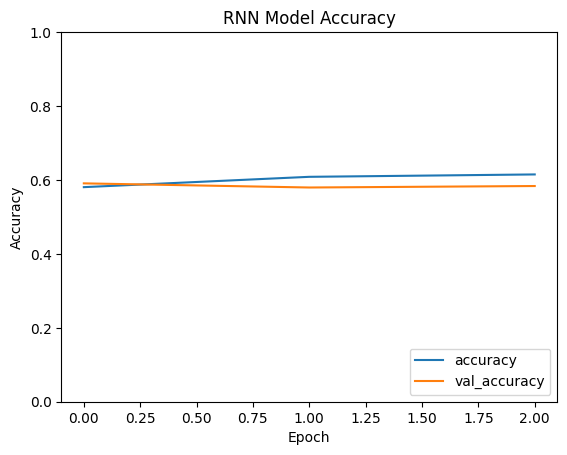

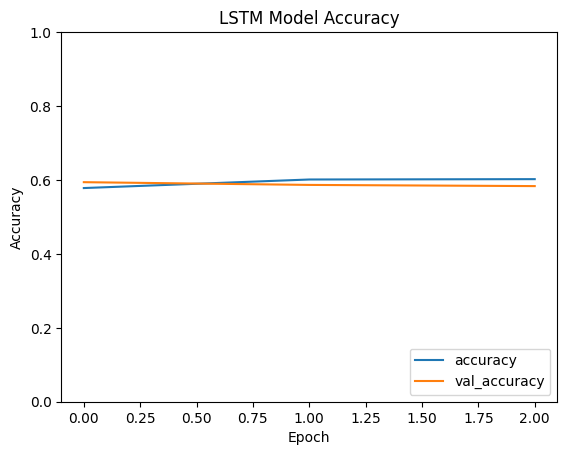

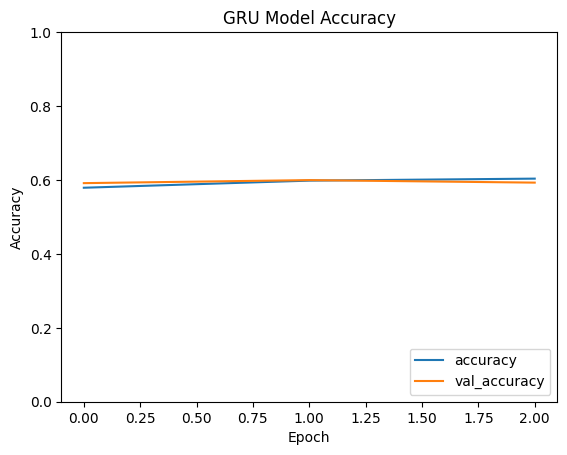

In [52]:

def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()
plot_history(history_rnn, 'RNN Model Accuracy')
plot_history(history_lstm, 'LSTM Model Accuracy')
plot_history(history_gru, 'GRU Model Accuracy')
